In [1]:
import torch
from torch import nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
import requests
import zipfile
from pathlib import Path

data_path = Path('data/')
image_path = data_path/'pizza_steak_sushi'

if image_path.is_dir():
    print('Skipping creating')
else:
    print('Creating one')
    image_path.mkdir(parents=True, exist_ok=True)
    
with open(data_path/'pizza_steak_sushi.zip', 'wb') as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print('Downloading')
    f.write(request.content)
    
with zipfile.ZipFile(data_path/'pizza_steak_sushi.zip', 'r') as zip_ref:
    print('Unzipping')
    zip_ref.extractall(image_path)

Skipping creating
Downloading
Unzipping


In [9]:
import os

def walk_through_dir(dir_path):
    """Walks through dir path returning content"""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"{len(dirnames)} directories and {len(filenames)} images in {dirpath}")

walk_through_dir(image_path)

2 directories and 0 images in data\pizza_steak_sushi
3 directories and 0 images in data\pizza_steak_sushi\test
0 directories and 25 images in data\pizza_steak_sushi\test\pizza
0 directories and 19 images in data\pizza_steak_sushi\test\steak
0 directories and 31 images in data\pizza_steak_sushi\test\sushi
3 directories and 0 images in data\pizza_steak_sushi\train
0 directories and 78 images in data\pizza_steak_sushi\train\pizza
0 directories and 75 images in data\pizza_steak_sushi\train\steak
0 directories and 72 images in data\pizza_steak_sushi\train\sushi


In [10]:
train_dir = image_path/'train'
test_dir = image_path/'test'
train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

Image path: data\pizza_steak_sushi\train\pizza\2785084.jpg
Image class: pizza


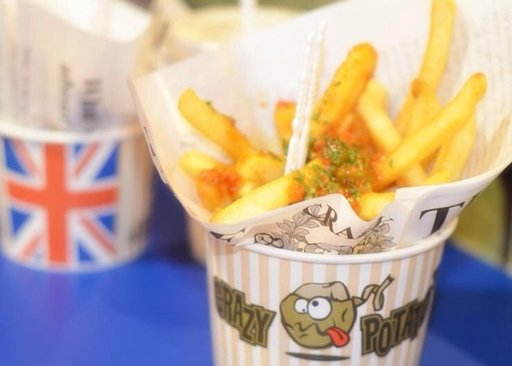

In [19]:
import random
from PIL import Image

# random.seed(42)

image_path_list = list(image_path.glob('*/*/*.jpg'))

random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

print('Image path:', random_image_path)
print('Image class:', image_class)
img

(-0.5, 511.5, 365.5, -0.5)

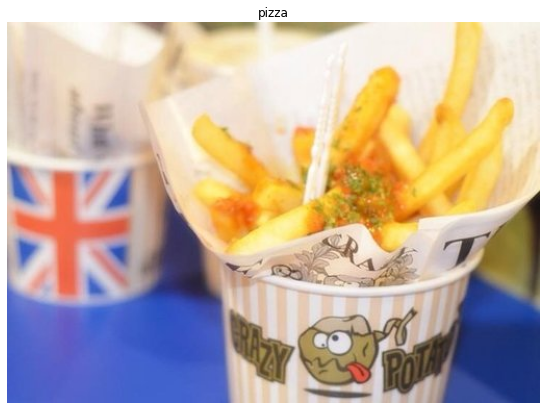

In [21]:
import numpy as np
import matplotlib.pyplot as plt

img_array = np.asarray(img)

plt.figure(figsize=(10, 7))
plt.imshow(img_array)
plt.title(image_class)
plt.axis(False)

In [27]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

data_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ToTensor()
])

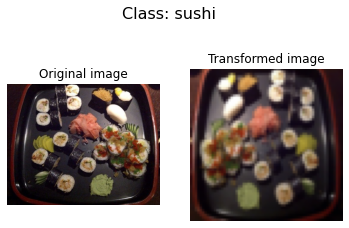

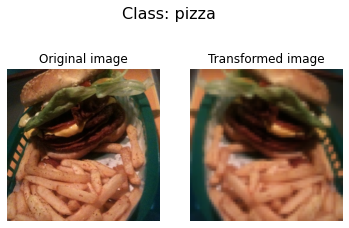

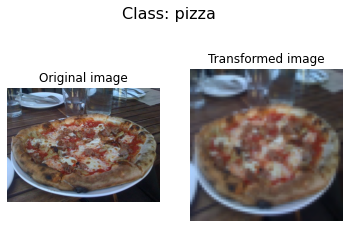

In [28]:
def plot_transformed_images(image_paths, transform, n=3, seed=None):
    """Selects random images, applies transforms, plots original vs transformed image"""
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title('Original image')
            ax[0].axis(False)
            
            transformed = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed)
            ax[1].set_title('Transformed image')
            ax[1].axis(False)
            
            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)
            
plot_transformed_images(image_path_list, data_transform, n=3, seed=42)